In [1]:
#Data analysis
import numpy as np
import pandas as pd

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore',category=Warning)

pd.set_option('display.max_columns',None)
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [3]:
print(matches.shape,deliveries.shape)

(756, 18) (179078, 21)


In [4]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# Data Cleaning

In [8]:
#city column
matches[matches['city'].isna()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [9]:
matches.loc[matches['city'].isna(),'city']='Dubai'

In [10]:
#winner column
matches[matches['winner'].isna()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [11]:
#winner and player_of_match columns
matches.loc[matches['winner'].isna(),'winner']='No Winner'
matches.loc[matches['player_of_match'].isna(),'player_of_match']='No player_of_match'


In [12]:
#umpire1 and umpire2 column
matches[matches['umpire1'].isna()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [13]:
matches.loc[(matches['umpire1'].isna())|(matches['id']==5),['umpire1','umpire2']]=['S ravi','VK Sharma']
matches.loc[(matches['umpire1'].isna())|(matches['id']==11413),['umpire1','umpire2']]=['Bruce Oxenford','S Ravi']


In [14]:
matches.drop('umpire3',axis=1,inplace=True)

In [15]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
dtypes: int64(4), object(13)
memory usag

In [16]:
matches.replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)
deliveries.replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)

matches.replace(to_replace='Delhi Capitals',value='Delhi Daredevils',inplace=True)
deliveries.replace(to_replace='Delhi Capitals',value='Delhi Daredevils',inplace=True)

In [17]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
dtypes: int64(4), object(13)
memory usag

In [18]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# EDA

In [19]:
matches['Season'].value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2014    60
IPL-2016    60
IPL-2018    60
IPL-2019    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

In [20]:
matches['Season'].value_counts().reset_index()

,index,Season
0,IPL-2013,76
1,IPL-2012,74
2,IPL-2011,73
3,IPL-2010,60
4,IPL-2014,60
5,IPL-2016,60
6,IPL-2018,60
7,IPL-2019,60
8,IPL-2017,59
9,IPL-2015,59


**Total number of Matches in each Season**

[Text(0.5, 1.0, 'Total number of matches in each season')]

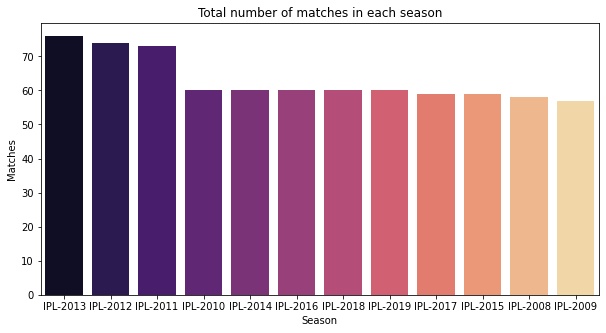

In [21]:

total_matches_season=matches['Season'].value_counts().reset_index()
total_matches_season.columns=['Season','Matches']
plt.figure(figsize=(10,5))
sns.barplot(x='Season',y='Matches',data=total_matches_season,palette='magma').set(title='Total number of matches in each season')

**Matches Played Vs Win by each Team**

In [22]:

matches_played=pd.concat([matches['team1'],matches['team2']],axis=0)
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches Played']
matches_played['winner']=matches['winner'].value_counts().reset_index()['winner']
matches_played['winning_percentage']=matches_played['winner']/matches_played['Total Matches Played']
matches_played


,Team,Total Matches Played,winner,winning_percentage
0,Mumbai Indians,187,109,0.582888
1,Royal Challengers Bangalore,180,100,0.555556
2,Kolkata Knight Riders,178,92,0.516854
3,Delhi Daredevils,177,84,0.474576
4,Kings XI Punjab,176,82,0.465909
5,Chennai Super Kings,164,77,0.469512
6,Rajasthan Royals,147,75,0.510204
7,Sunrisers Hyderabad,108,58,0.537037
8,Deccan Chargers,75,29,0.386667
9,Pune Warriors,46,15,0.326087


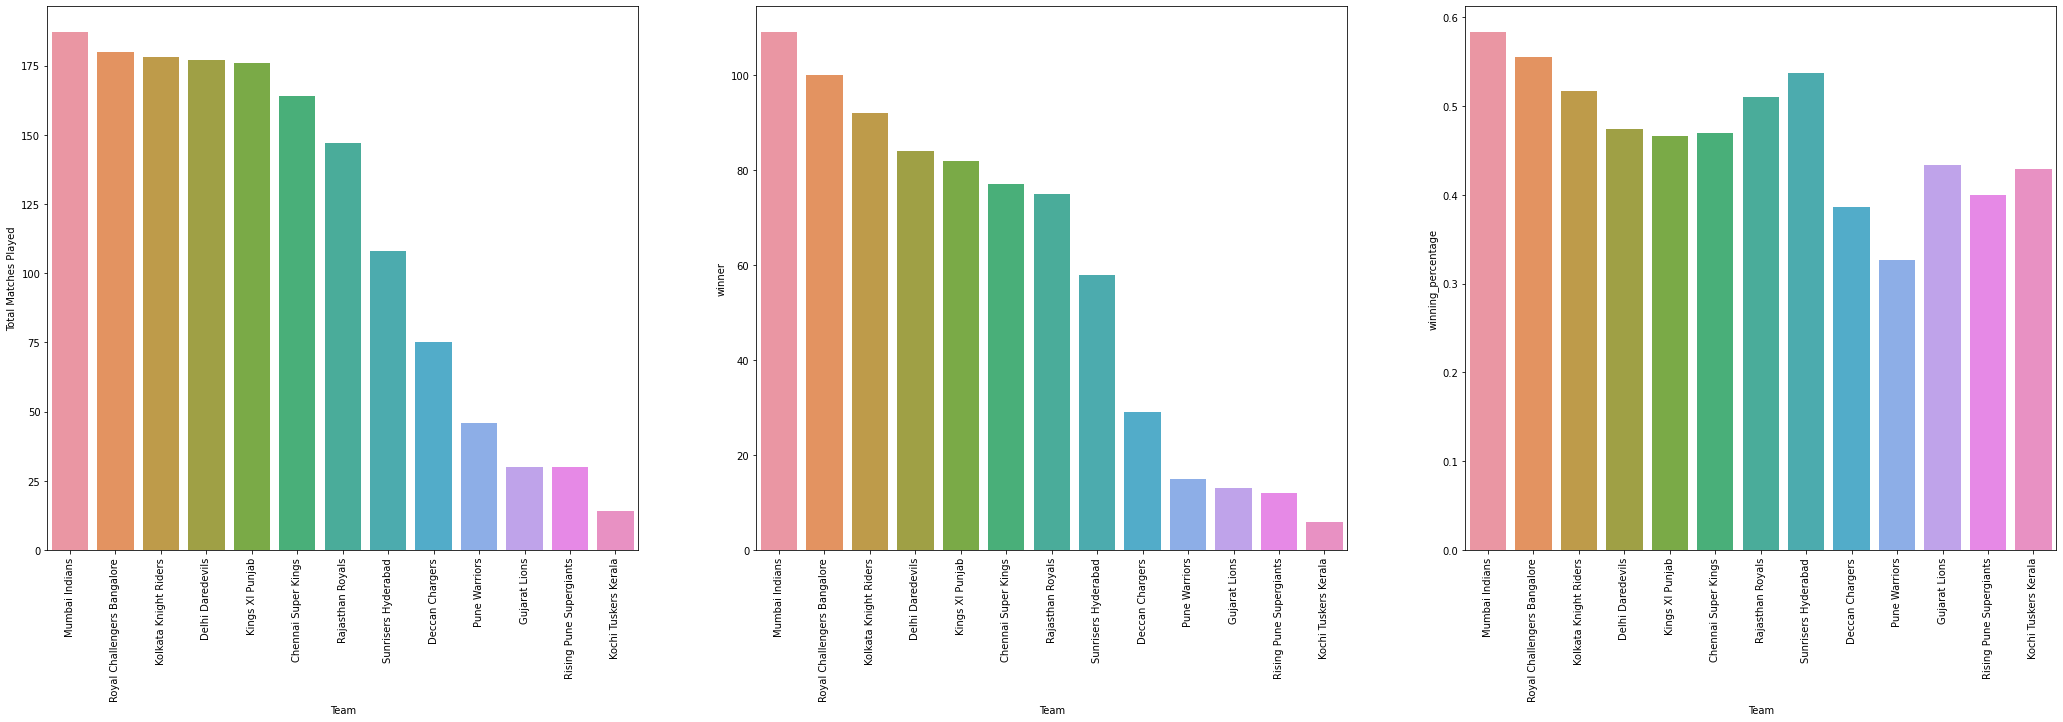

In [23]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(36,10))
sns.barplot(x='Team',y='Total Matches Played',data=matches_played,ax=axes[0]).set_xticklabels(matches_played['Team'],rotation=90)
sns.barplot(x='Team',y='winner',data=matches_played,ax=axes[1]).set_xticklabels(matches_played['Team'],rotation=90)
sns.barplot(x='Team',y='winning_percentage',data=matches_played,ax=axes[2]).set_xticklabels(matches_played['Team'],rotation=90);



**Which City has hosted maximum number of matches**

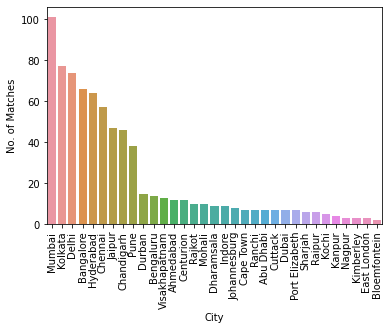

In [24]:
matches_city=matches['city'].value_counts().reset_index().sort_values(by='city',ascending=False)
matches_city.columns=['City','No. of Matches']
sns.barplot(x='City',y='No. of Matches',data=matches_city).set_xticklabels(matches_city['City'],rotation=90);

**Number of Matches Hosted in each Stadium**

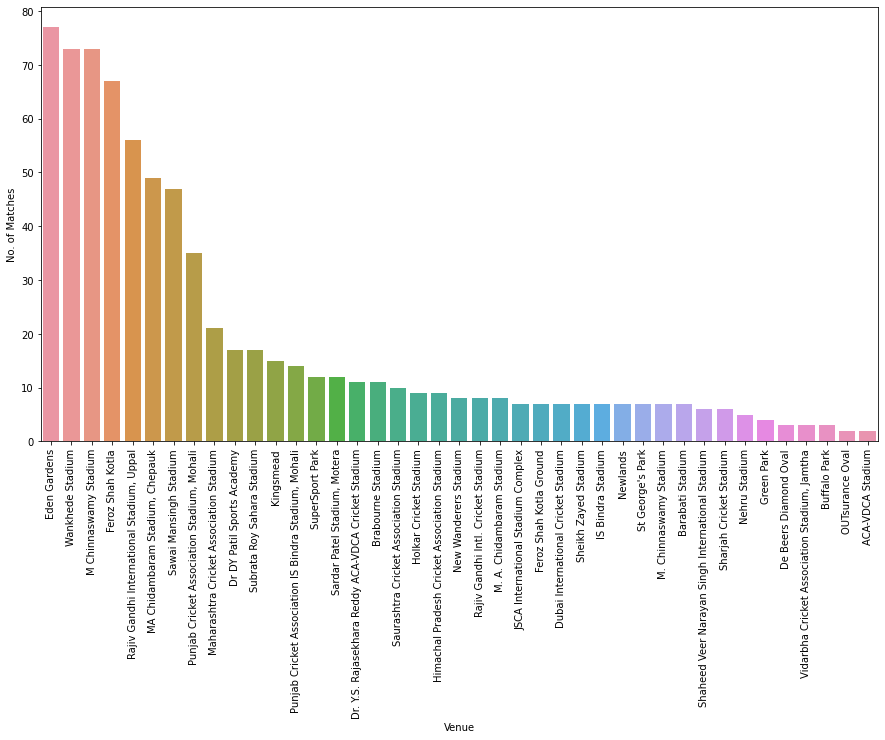

In [25]:
fig,axes=plt.subplots(figsize=(15,8))
matches_venue=matches['venue'].value_counts().reset_index().sort_values(by='venue',ascending=False)
matches_venue.columns=['Venue','No. of Matches']
sns.barplot(x='Venue',y='No. of Matches',data=matches_venue).set_xticklabels(matches_venue['Venue'],rotation=90);

**Total and Average Runs per Season**

In [26]:
runs=matches.merge(deliveries,left_on='id',right_on='match_id',how='left').drop('id',axis=1)
total_runs_season=runs.groupby(['Season'])['total_runs'].sum().reset_index()
matches_season=matches.groupby(['Season']).count()['id'].reset_index()
matches_season.rename(columns={'id':'matches'},inplace=True)
matches_season['total_runs']=total_runs_season['total_runs']
matches_season['average_runs_per_match']=matches_season['total_runs']/matches_season['matches']
matches_season

,Season,matches,total_runs,average_runs_per_match
0,IPL-2008,58,17937,309.258621
1,IPL-2009,57,16353,286.894737
2,IPL-2010,60,18883,314.716667
3,IPL-2011,73,21154,289.780822
4,IPL-2012,74,22453,303.418919
5,IPL-2013,76,22602,297.394737
6,IPL-2014,60,18931,315.516667
7,IPL-2015,59,18353,311.067797
8,IPL-2016,60,18862,314.366667
9,IPL-2017,59,18786,318.406780


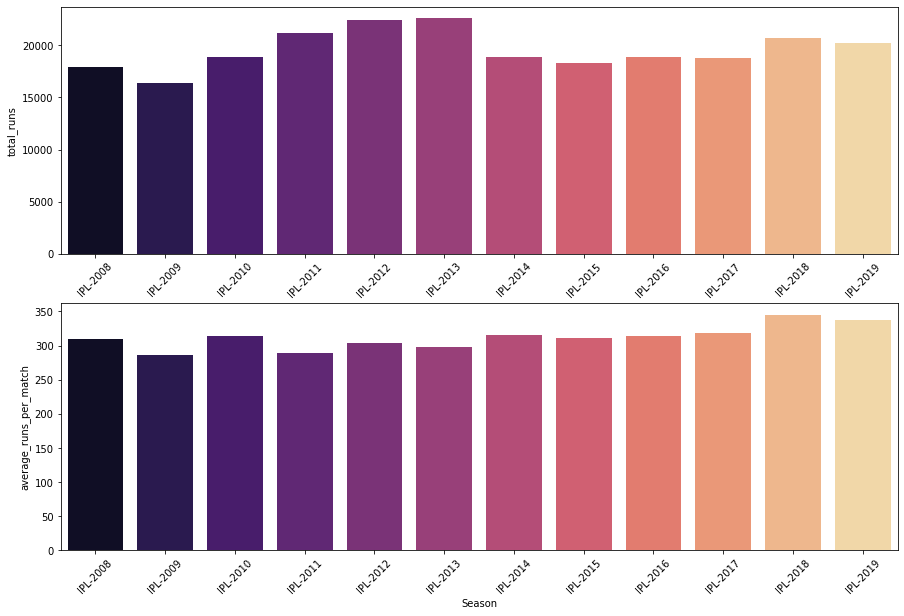

In [27]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(15,10))
sns.barplot(x='Season',y='total_runs',data=matches_season,ax=axes[0],palette='magma').set_xticklabels(matches_season['Season'],rotation=45)
sns.barplot(x='Season',y='average_runs_per_match',data=matches_season,ax=axes[1],palette='magma').set_xticklabels(matches_season['Season'],rotation=45);

**Number of Runs Scored as Percentage of Boundaries**

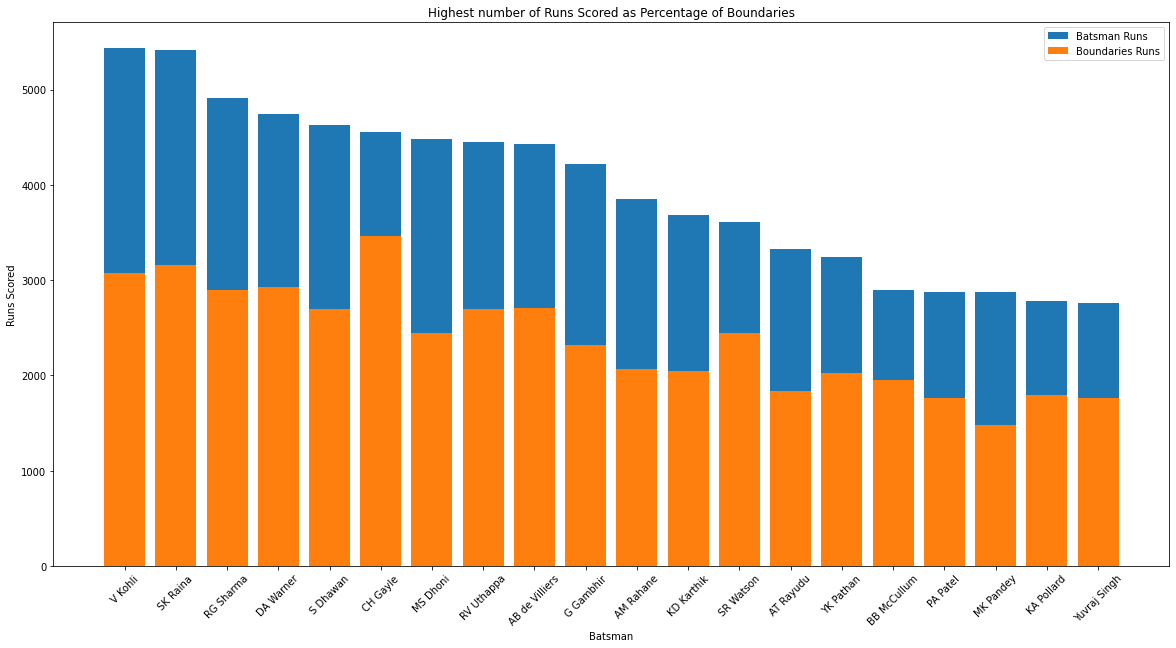

In [28]:
deliveries['boundaries']=0

deliveries.loc[(deliveries['batsman_runs']>=4)&(deliveries['batsman_runs']!=6),'boundaries']=4
deliveries.loc[(deliveries['batsman_runs']>=6),'boundaries']=6

percentage_runs_boundaries=pd.merge(deliveries[['batsman','batsman_runs']].groupby(by='batsman').sum().reset_index(),deliveries[['batsman','boundaries']].groupby(by='batsman').sum().reset_index(),how='outer')

percentage_runs_boundaries['run%']=np.round(percentage_runs_boundaries['boundaries']*100/percentage_runs_boundaries['batsman_runs'])
percentage_runs_boundaries=percentage_runs_boundaries.sort_values(by='run%',ascending=False)

percentage_runs_boundaries.dropna(inplace=True)
percentage_runs_boundaries=percentage_runs_boundaries.sort_values(by='batsman_runs',ascending=False).head(20)
plt.figure(figsize=[20,10])
plt.bar(percentage_runs_boundaries['batsman'],percentage_runs_boundaries['batsman_runs'],label='Batsman Runs',bottom=0)
plt.bar(percentage_runs_boundaries['batsman'],percentage_runs_boundaries['boundaries'],label='Boundaries Runs',bottom=0)
plt.title('Highest number of Runs Scored as Percentage of Boundaries')
plt.xlabel('Batsman')
plt.ylabel('Runs Scored')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Top 20 Players with most Player_Of_Match Award**

In [29]:
matches['player_of_match'].value_counts().reset_index().head(10)

,index,player_of_match
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


[Text(0.5, 1.0, 'Total Number Of Player Of Match')]

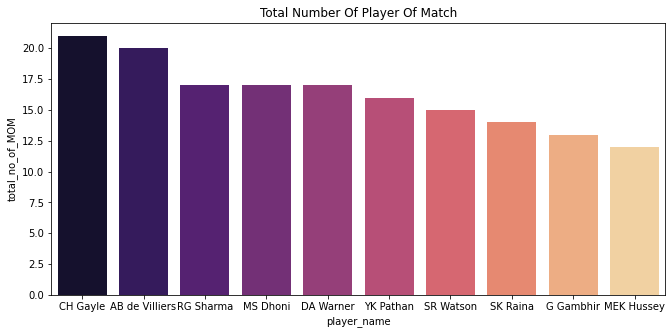

In [30]:
number_of_player_of_match=matches['player_of_match'].value_counts().reset_index().head(10)
number_of_player_of_match.columns=['player_name','total_no_of_MOM']

plt.figure(figsize=[11,5])
sns.barplot(x='player_name',y='total_no_of_MOM',data=number_of_player_of_match,palette='magma').set(title='Total Number Of Player Of Match')